# Imports

In [53]:
import pandas as pd
import matplotlib.ticker as mticks

In [55]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

In [25]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0


In [34]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [39]:
drop_cols = ['RegionID','SizeRank','RegionType', 'StateName',
       'State', 'Metro', 'CountyName']

In [40]:
id_vars = ['RegionName']
value_name='Price'
var_name='Date'

In [41]:
melted = pd.melt(df.drop(drop_cols, axis=1)[:4],id_vars=id_vars,value_name=value_name, var_name=var_name)
melted

,RegionName,Date,Price
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [42]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   Date        1092 non-null   datetime64[ns]
 2   Price       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.7+ KB


In [43]:
melted = melted.set_index("Date")
melted

,RegionName,Price
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


In [47]:
df_ts = melted.groupby('RegionName').resample("MS").mean()
df_ts

C:\Users\mmenj\AppData\Local\Temp\ipykernel_36184\101247338.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("MS").mean()


Price
RegionName Date                
Chicago    2000-01-01  166139.0
           2000-02-01  166536.0
           2000-03-01  167368.0
           2000-04-01  168826.0
           2000-05-01  170499.0
...                         ...
New York   2022-05-01  768797.0
           2022-06-01  773944.0
           2022-07-01  777692.0
           2022-08-01  779960.0
           2022-09-01  781622.0

[1092 rows x 1 columns]

In [50]:
unstacked = df_ts.unstack(level=0)
unstacked

Price                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [59]:
fmt_thous = mticks.FuncFormatter(thousands)

[Text(0.5, 1.0, 'Typical Home Value'), Text(0, 0.5, 'Dollars')]

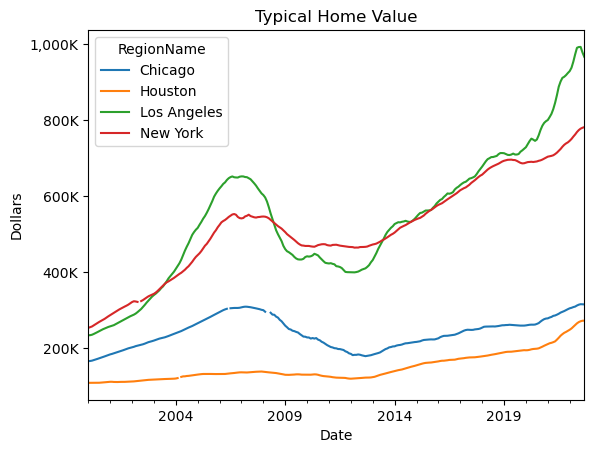

In [85]:
ax = unstacked['Price'].plot()
ax.yaxis.set_major_formatter(fmt_thous)
ax.set(title='Typical Home Value', ylabel='Dollars')

 Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [84]:
unstacked.loc['2008-12']

Price                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-12-01  265306.0  131283.0    469294.0  510309.0

In [86]:
maxcity = unstacked.loc['2008-12'].idxmax(axis=1)[0][1] 
# axis=1 looks for max along columns and returns row, 
# [0] returns value of row but since stacked with Price isolate 2nd value with [0] to get city
print(f'The city that had the highest Typical Home Value at the end of 2008 was {maxcity}')

The city that had the highest Typical Home Value at the end of 2008 was New York


In [89]:
mincity = unstacked.loc['2008-12'].idxmin(axis=1)[0][1] 
# axis=1 looks for min along columns and returns row, 
# [0] returns value of row but since stacked with Price isolate 2nd value with [0] to get city
print(f'The city that had the least Typical Home Value at the end of 2008 was {mincity}')

The city that had the least Typical Home Value at the end of 2008 was Houston


How much did the home values change from November 2008 to December 2008 (in dollars)?

In [98]:
unstacked.loc['2008-11':'2008-12'].diff()

Price                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-11-01     NaN     NaN         NaN      NaN
2008-12-01 -5753.0  -964.0    -12611.0  -4458.0